# INF250: Tasks week 8

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops

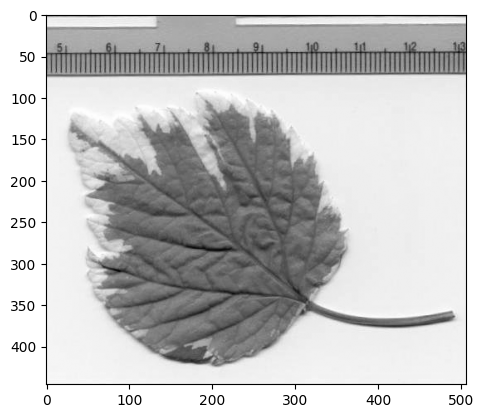

In [11]:
image = io.imread("images/leaf.jpg")
gray = color.rgb2gray(image)
gray = (gray * 255).astype(np.uint8)
plt.imshow(gray, cmap='gray')

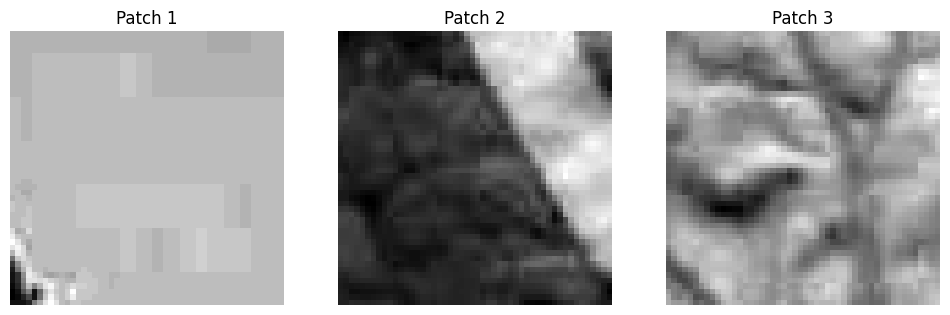

In [12]:
patch1 = gray[100:150, 300:350]
patch2 = gray[150:200, 150:200]
patch3 = gray[250:300, 250:300]

patches = [patch1, patch2, patch3]
titles = ['Patch 1', 'Patch 2', 'Patch 3']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, patch, title in zip(axes, patches, titles):
    ax.imshow(patch, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

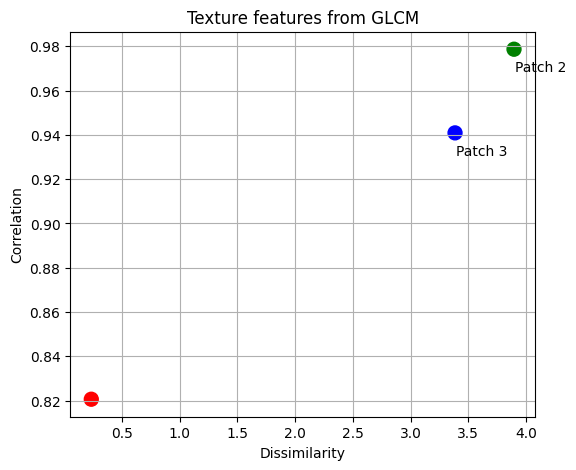

In [14]:
dissimilarities = []
correlations = []

for patch in patches:
    glcm = graycomatrix(patch, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    dis = graycoprops(glcm, 'dissimilarity')[0, 0]
    corr = graycoprops(glcm, 'correlation')[0, 0]
    dissimilarities.append(dis)
    correlations.append(corr)

plt.figure(figsize=(6, 5))
plt.scatter(dissimilarities, correlations, s=100, c=['r', 'g', 'b'])
for i, txt in enumerate(titles):
    plt.annotate(txt, (dissimilarities[i]+0.01, correlations[i]-0.01))
plt.xlabel('Dissimilarity')
plt.ylabel('Correlation')
plt.title('Texture features from GLCM')
plt.grid(True)
plt.show()

In [15]:
print("=== Texture Metrics ===")
for i in range(3):
    print(f"{titles[i]} -> Dissimilarity: {dissimilarities[i]:.3f}, Correlation: {correlations[i]:.3f}")

max_dis = titles[np.argmax(dissimilarities)]
max_corr = titles[np.argmax(correlations)]

print(f"\nPatch with highest dissimilarity: {max_dis}")
print(f"Patch with highest correlation: {max_corr}")

=== Texture Metrics ===
Patch 1 -> Dissimilarity: 0.234, Correlation: 0.821
Patch 2 -> Dissimilarity: 3.896, Correlation: 0.979
Patch 3 -> Dissimilarity: 3.385, Correlation: 0.941

Patch with highest dissimilarity: Patch 2
Patch with highest correlation: Patch 2
